# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
#Had to pip install CityPy
# pip install citipy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL 
# Note: used units = Imperial to get Fahrenheit. Default temps are in Kelvin 
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    city_weather =  response = requests.get(city_url).json()

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lng = city_weather["coord"]["lon"]   
        city_lat = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | bonavista
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | prince rupert
Processing Record 8 of Set 1 | thinadhoo
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | isilkul
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | bairiki
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | ubinskoye
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Proces

Processing Record 38 of Set 4 | shaunavon
Processing Record 39 of Set 4 | marystown
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | sahuaripa
Processing Record 42 of Set 4 | skjaerhollen
City not found. Skipping...
Processing Record 43 of Set 4 | karaman
Processing Record 44 of Set 4 | jieshi
Processing Record 45 of Set 4 | ponta delgada
Processing Record 46 of Set 4 | oudtshoorn
Processing Record 47 of Set 4 | erdenet
Processing Record 48 of Set 4 | ballina
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 0 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | vittoria
Processing Record 2 of Set 5 | luang prabang
Processing Record 3 of Set 5 | morondava
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | megion
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | olafsvik
Processing Record 8 of Set 5 | manokwari
Processing Record 9 of Set 5 | portland
Processing Record 10 of Se

Processing Record 27 of Set 8 | alofi
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | redmond
Processing Record 30 of Set 8 | mitsamiouli
Processing Record 31 of Set 8 | nelson bay
Processing Record 32 of Set 8 | haradok
Processing Record 33 of Set 8 | demirci
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | jardim
Processing Record 36 of Set 8 | tomaszow mazowiecki
Processing Record 37 of Set 8 | port hueneme
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | nivala
Processing Record 40 of Set 8 | maghama
City not found. Skipping...
Processing Record 41 of Set 8 | oberstdorf
Processing Record 42 of Set 8 | watsa
Processing Record 43 of Set 8 | beni
Processing Record 44 of Set 8 | bandarbeyla
Processing Record 45 of Set 8 | vardo
Processing Record 46 of Set 8 | mirnyy
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | sambalpur
Processing Record 49 o

Processing Record 11 of Set 12 | niteroi
Processing Record 12 of Set 12 | tomatlan
Processing Record 13 of Set 12 | saint anthony
Processing Record 14 of Set 12 | okato
Processing Record 15 of Set 12 | bubaque
Processing Record 16 of Set 12 | shizilu
Processing Record 17 of Set 12 | mapiripan
Processing Record 18 of Set 12 | oistins
Processing Record 19 of Set 12 | kendal
Processing Record 20 of Set 12 | rio grande
Processing Record 21 of Set 12 | khorixas
Processing Record 22 of Set 12 | sur
Processing Record 23 of Set 12 | adelaide
Processing Record 24 of Set 12 | ajdabiya
Processing Record 25 of Set 12 | amberley
Processing Record 26 of Set 12 | alyangula
Processing Record 27 of Set 12 | houma
Processing Record 28 of Set 12 | fereydun kenar
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | kolondieba
Processing Record 31 of Set 12 | kaduqli
Processing Record 32 of Set 12 | encruzilhada
Processing Record 33 of Set 12 | huangmei
Processing Record 34 of Set 12

In [22]:
city_weather

{'coord': {'lon': 70.8333, 'lat': 66.8333},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 25.68,
  'feels_like': 13.08,
  'temp_min': 25.68,
  'temp_max': 25.68,
  'pressure': 999,
  'humidity': 92,
  'sea_level': 999,
  'grnd_level': 998},
 'visibility': 1150,
 'wind': {'speed': 26.93, 'deg': 213, 'gust': 42.77},
 'clouds': {'all': 100},
 'dt': 1679377591,
 'sys': {'country': 'RU', 'sunrise': 1679361314, 'sunset': 1679405567},
 'timezone': 18000,
 'id': 1486321,
 'name': 'Yar-Sale',
 'cod': 200}

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,17.60,73,75,8.05,CA,1679377231
1,avarua,-21.2078,-159.7750,80.65,83,69,4.61,CK,1679377232
2,bonavista,48.6499,-53.1147,29.07,75,100,30.31,CA,1679377232
3,hobart,-42.8794,147.3294,64.26,53,75,9.22,AU,1679377136
4,anadyr,64.7500,177.4833,12.70,85,100,29.08,RU,1679377233


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,17.60,73,75,8.05,CA,1679377231
1,avarua,-21.2078,-159.7750,80.65,83,69,4.61,CK,1679377232
2,bonavista,48.6499,-53.1147,29.07,75,100,30.31,CA,1679377232
3,hobart,-42.8794,147.3294,64.26,53,75,9.22,AU,1679377136
4,anadyr,64.7500,177.4833,12.70,85,100,29.08,RU,1679377233


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

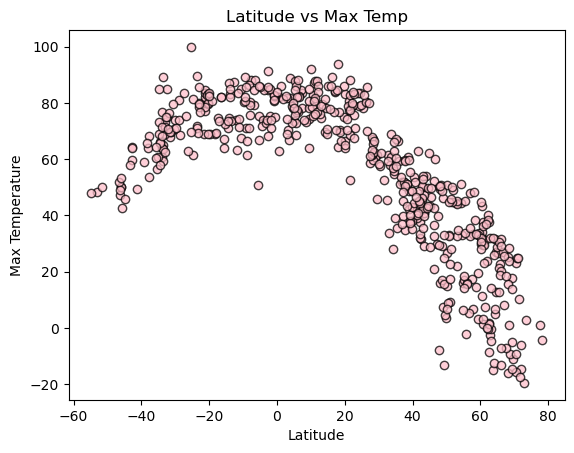

In [27]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

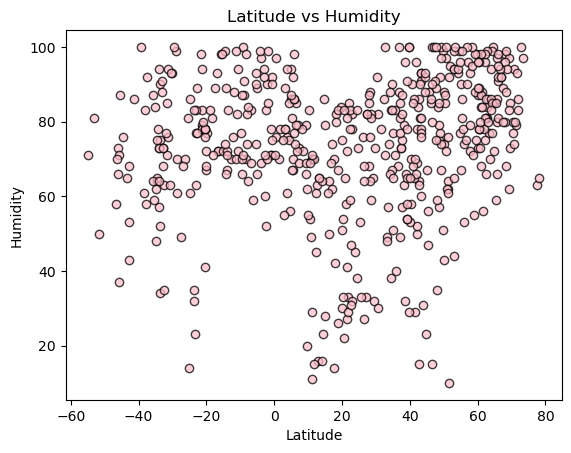

In [28]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

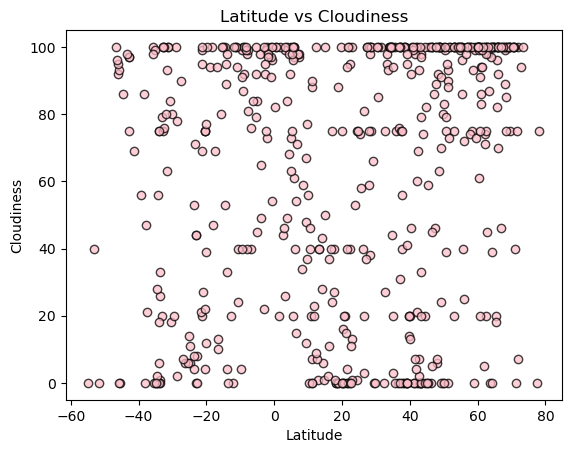

In [29]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

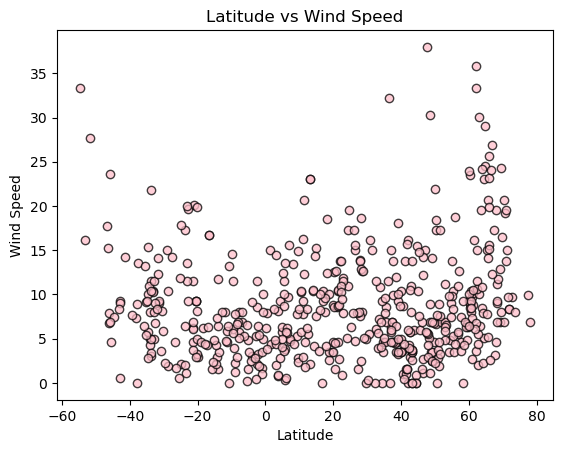

In [30]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x_axis, y_axis, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate y values from slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot and Format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {round(r_value**2,3)}")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,17.60,73,75,8.05,CA,1679377231
2,bonavista,48.6499,-53.1147,29.07,75,100,30.31,CA,1679377232
4,anadyr,64.7500,177.4833,12.70,85,100,29.08,RU,1679377233
6,prince rupert,54.3161,-130.3201,44.29,93,100,3.44,CA,1679377143
7,thinadhoo,0.5333,72.9333,82.02,76,100,7.87,MV,1679377236


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<0)])


# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,80.65,83,69,4.61,CK,1679377232
3,hobart,-42.8794,147.3294,64.26,53,75,9.22,AU,1679377136
5,kavieng,-2.5744,150.7967,84.45,60,92,8.57,PG,1679377235
11,punta arenas,-53.1500,-70.9167,48.31,81,40,16.11,CL,1679377002
12,busselton,-33.6500,115.3333,89.28,34,26,11.50,AU,1679377238
...,...,...,...,...,...,...,...,...,...
522,khorixas,-20.3667,14.9667,68.81,41,22,2.95,NaN,1679377581
524,adelaide,-34.9333,138.6000,85.05,48,0,9.22,AU,1679377507
527,alyangula,-13.8483,136.4192,84.74,71,98,11.72,AU,1679377584


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.782


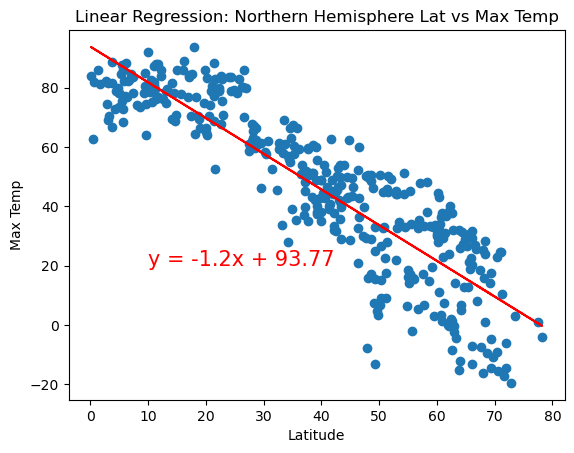

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Max Temp", "Max Temp",(10,20))
plt.show()

The r-squared is: 0.395


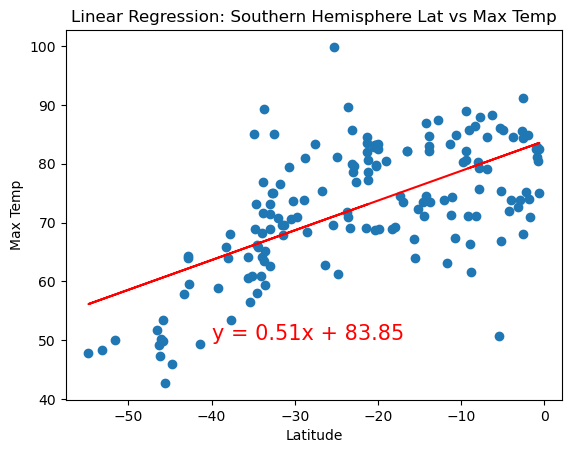

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Max Temp", "Max Temp",(-40,50))
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between max temp and latitude in the Northern Hemipshere. As the latitude increases, the max temp decreases. The inverse relationship exists in the Southern Hemisphere (a positive correlation) - as latitide increases, so does max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.122


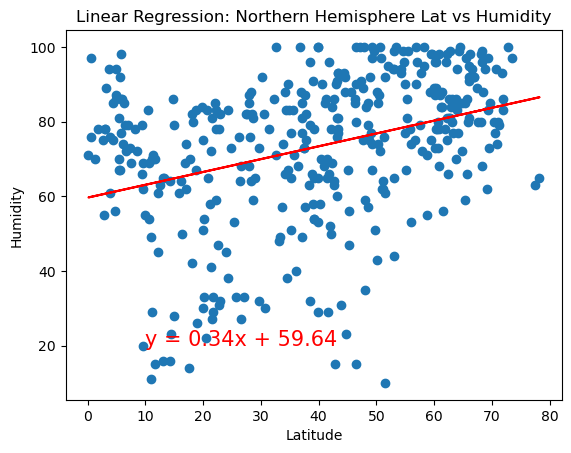

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Humidity", "Humidity",(10,20))
plt.show()

The r-squared is: 0.076


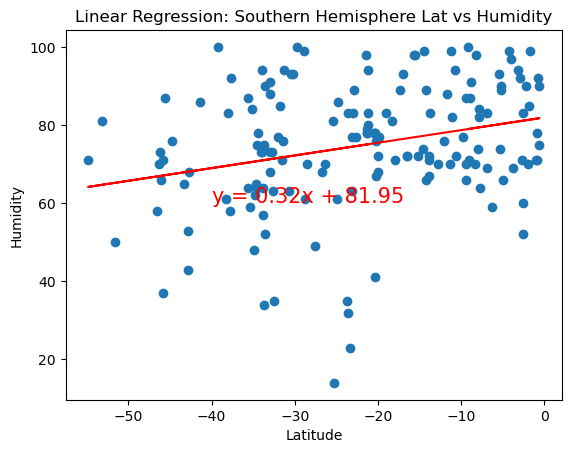

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Humidity", "Humidity",(-40,60))
plt.show()

**Discussion about the linear relationship:** There is a positive correlation between latitude and humidity - this is observed in both the northern/southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.074


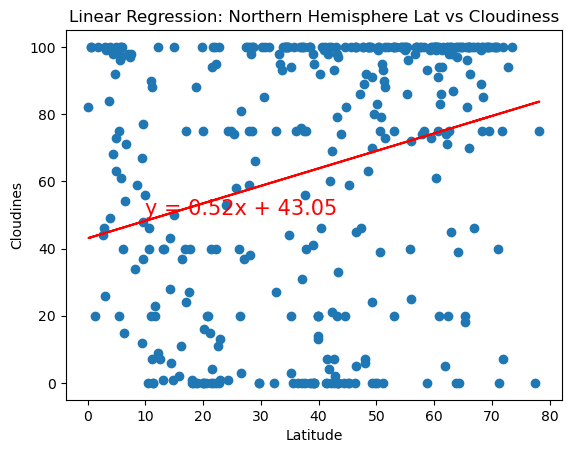

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Cloudiness", "Cloudines",(10,50))
plt.show()


The r-squared is: 0.07


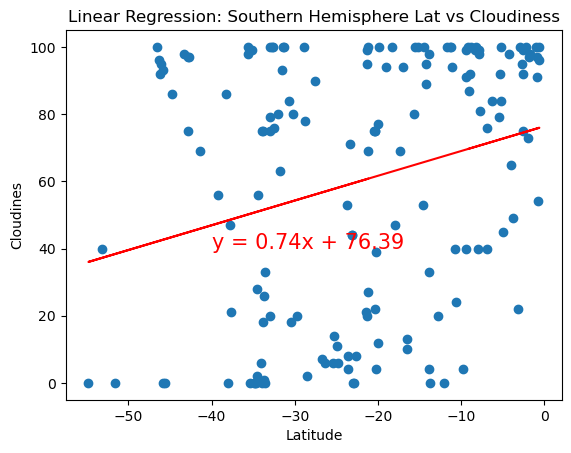

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Cloudiness", "Cloudines",(-40,40))
plt.show()


**Discussion about the linear relationship:** There appears to be a slight positive correlation between cloudiness and latitude in both the southern hemisphere. The relationship in the northern hemisphere looks postive at face value, but it is liekly driven by a the large sample size of cities with 100% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04


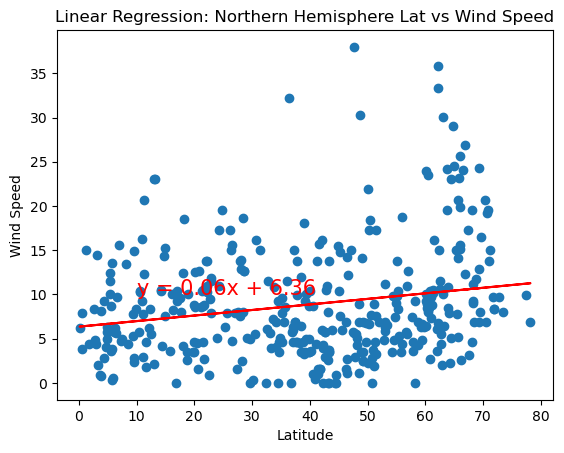

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere Lat vs Wind Speed", "Wind Speed",(10,10))
plt.show()

The r-squared is: 0.166


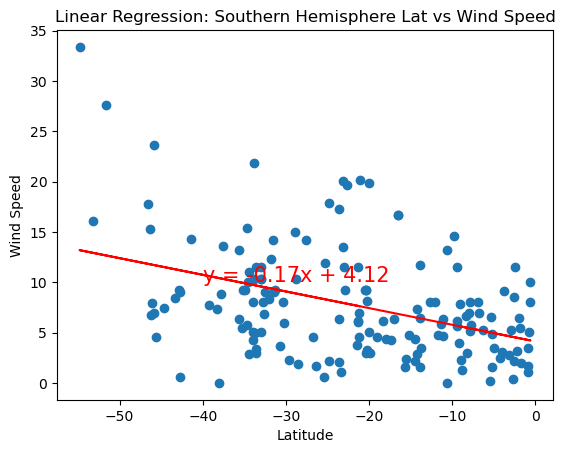

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere Lat vs Wind Speed", "Wind Speed",(-40,10))
plt.show()

**Discussion about the linear relationship:** There is a negative correlation between wind speed and latitude within the southern hemipshere. There is a slightly positive correlation in the southern hemisphere.